In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_plot import plot_mean_std, plot_all_roc_curves, plot_all_pr_curves, plot_all_comparisons, populate_arrs_for_df, print_latex_performance

## Loading ADNI test data
python inference.py --dataset_location data/adni_test_scaled_corrected.csv --dataset_id adni

python inference.py --dataset_location data/adni_test_scaled_corrected.csv --dataset_id adni --do_single_pass

---

python inference.py --dataset_location data/adni_train_scaled_corrected.csv --dataset_id adni_train

python inference.py --dataset_location data/adni_train_scaled_corrected.csv --dataset_id adni_train --do_single_pass

For balanced run:

python inference.py --dataset_location data/adni_test_scaled_corrected.csv --dataset_id adni --wb_model_id 18wkp0n2

... and change file location from `latest_output_adni_50.csv` to `latest_output_adni_50_18wkp0n2.csv`

In [ ]:
adni_diag = pd.read_csv('../data/adni_test_scaled_corrected.csv', index_col=0)['diagnosis']
adni_diag

In [ ]:
res_df = pd.read_csv('latest_output_adni_50.csv', index_col=0)
res_df

In [ ]:
joined_df = res_df.join(adni_diag, how='inner')
joined_df

In [ ]:
single_pass = pd.read_csv('latest_output_adni_1.csv', index_col=0)
single_pass = single_pass.join(adni_diag, how='inner')
#single_pass = single_pass[(single_pass.diagnosis == 'AD') | (single_pass.diagnosis == 'Control')]
single_pass

In [ ]:
# Creating column of extremes to better evaluate distance to extremes and order
joined_df['extremes'] = joined_df['mean']
joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes'] = 1 - joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes']
joined_df

In [ ]:
single_pass['extremes'] = single_pass['mean']
single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes'] = 1 - single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes']
single_pass

## How mean/std look like in ADNI test set

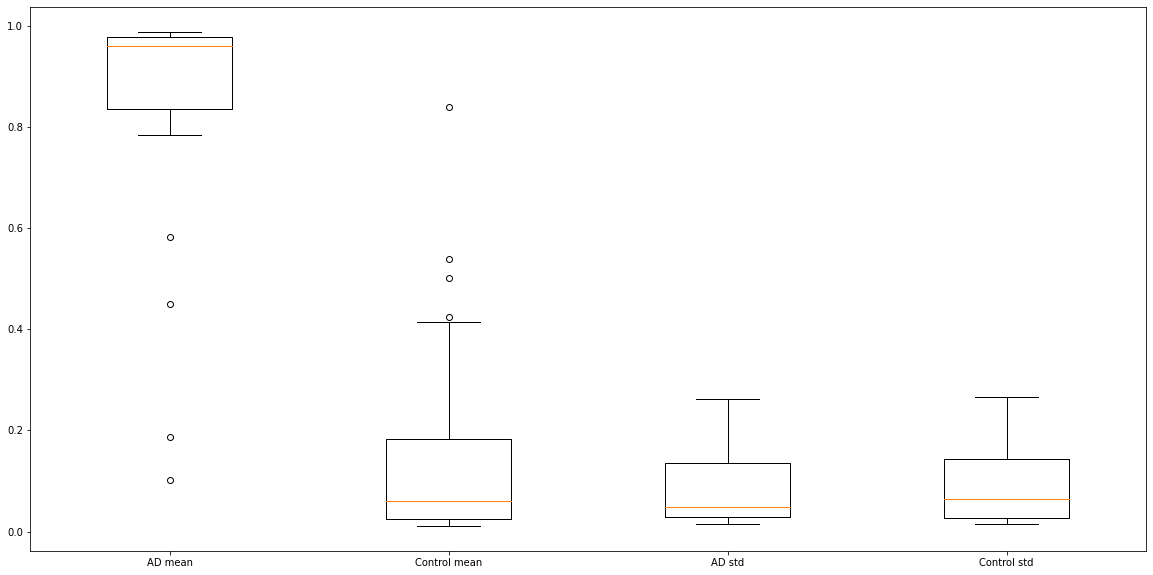

In [8]:
plt.subplots(figsize=(20, 10))
all_data = [joined_df[joined_df.diagnosis == 1]['mean'].values, 
            joined_df[joined_df.diagnosis == 0]['mean'].values,
            ##
            joined_df[joined_df.diagnosis == 1]['std'].values,
            joined_df[joined_df.diagnosis == 0]['std'].values,]


_ = plt.boxplot(all_data, labels=['AD mean', 'Control mean',
                                  'AD std', 'Control std'])
plt.show()
plt.close()

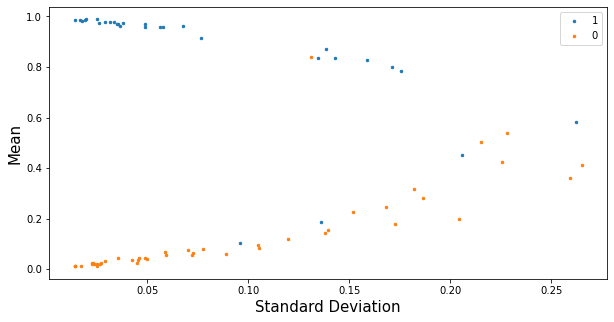

In [9]:
plot_mean_std(joined_df, [1, 0])

# Performance Metrics

In [46]:
print_latex_performance(single_pass)

0.95 & 0.98 & 0.9 & 0.98 & 0.96 & 0.93 \\ 
0.06
0.07


In [47]:
print_latex_performance(joined_df)

0.92 & 0.97 & 0.9 & 0.93 & 0.9 & 0.93 \\ 
0.06
0.07


In [10]:
# Output for run 18wkp0n2 (balanced training set)
print_latex_performance(joined_df)

0.89 & 0.97 & 0.87 & 0.91 & 0.87 & 0.91 \\ 
0.07
0.09


## MC-Drop vs single-pass: AUC-ROC/PR Curves

Best treshold for MC-Drop: 0.5821690559387207
Best treshold for Single Pass: 0.5884669423103333


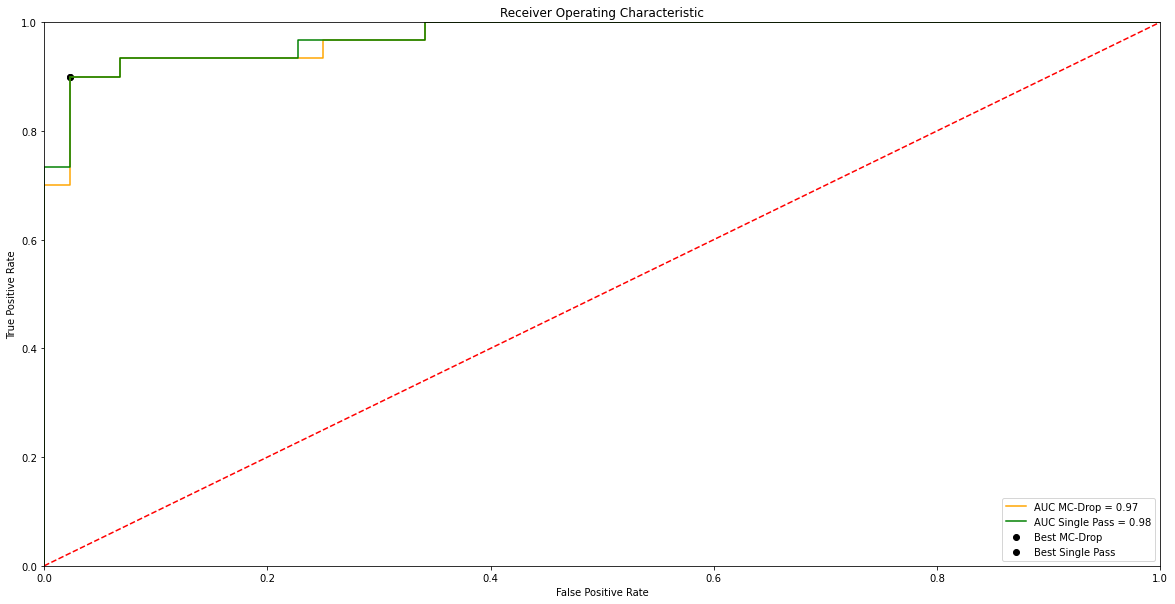

In [11]:
plot_all_roc_curves(joined_df, single_pass)

Best Threshold for MC-Drop=0.582169, F-Score=0.931
Best Threshold for Single Pass=0.588467, F-Score=0.931


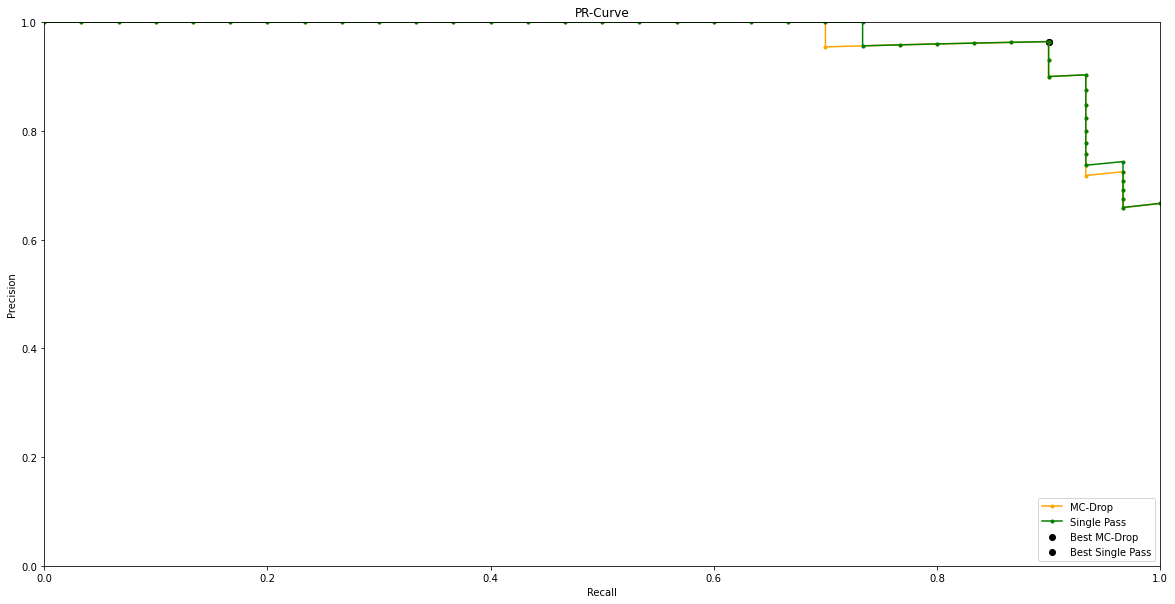

In [12]:
plot_all_pr_curves(joined_df, single_pass)

### AUC ROC Curve for training data

Best treshold for MC-Drop: 0.3765868246555328
Best treshold for Single Pass: 0.35471439361572266


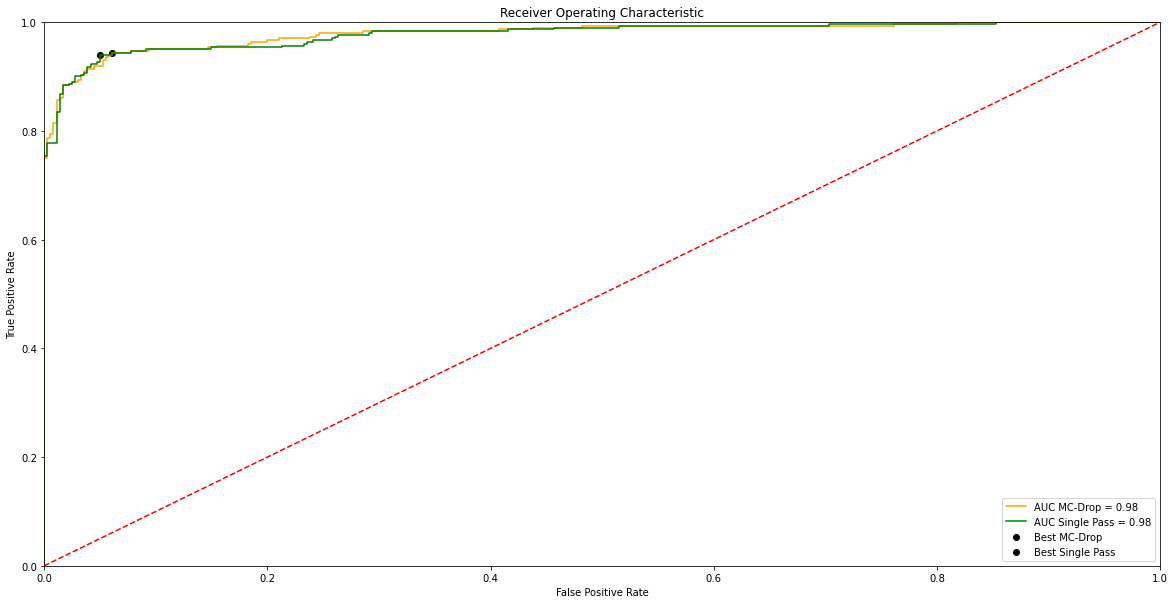

In [13]:
adni_train_diag = pd.read_csv('../data/adni_train_scaled_corrected.csv', index_col=0)['diagnosis']
res_train_df = pd.read_csv('latest_output_adni_train_50.csv', index_col=0)
joined_train_df = res_train_df.join(adni_train_diag, how='inner')



single_train_pass = pd.read_csv('latest_output_adni_train_1.csv', index_col=0)
single_train_pass = single_train_pass.join(adni_train_diag, how='inner')

plot_all_roc_curves(joined_train_df, single_train_pass)

# MC-Drop (uncertainty) vs MC-Drop (delta) vs single-pass (delta)

## At threshold = 0.5

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


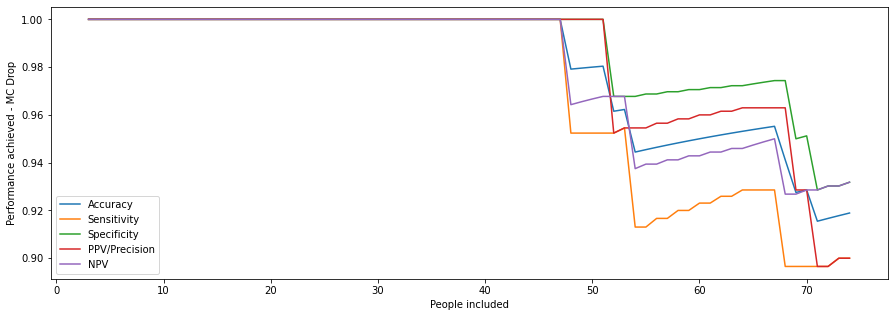

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


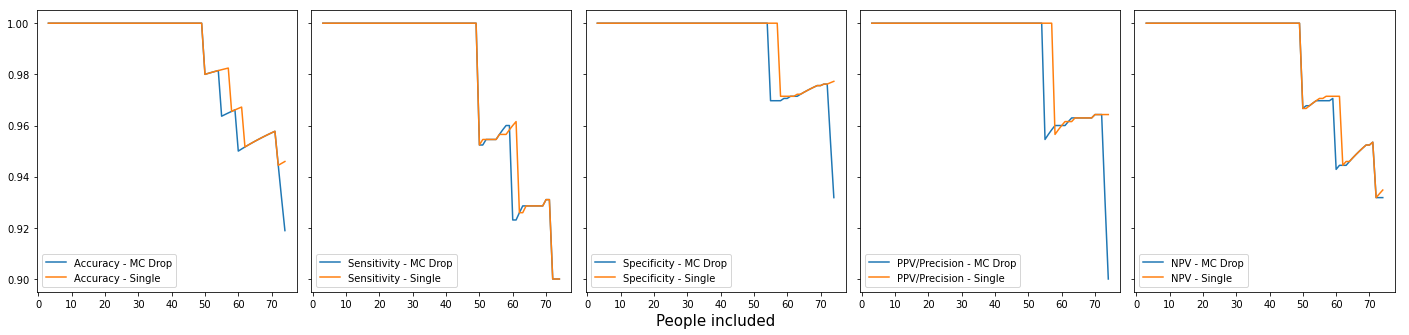

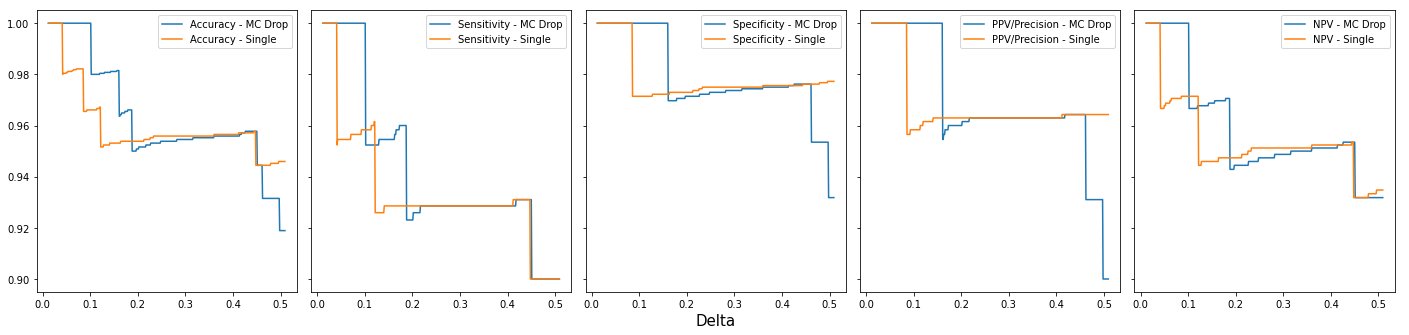

#####################################################################################
################# All 3 approaches together
#####################################################################################


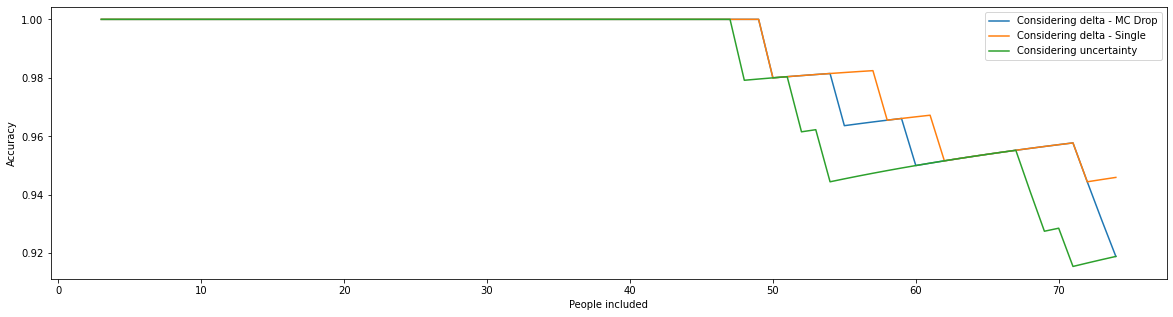

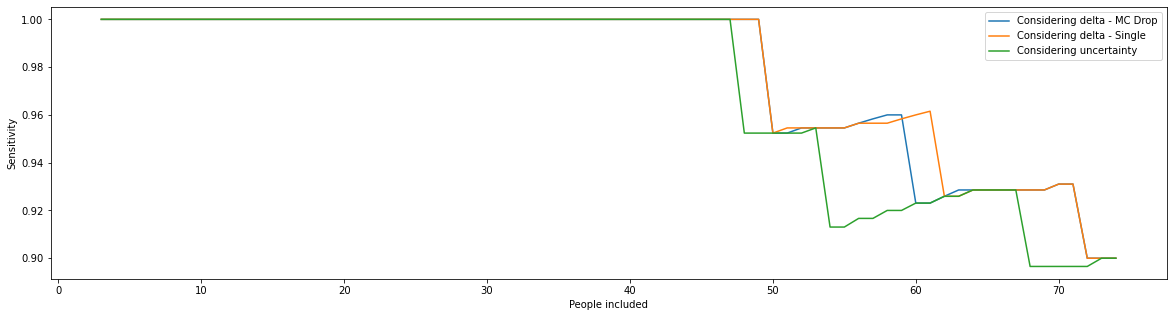

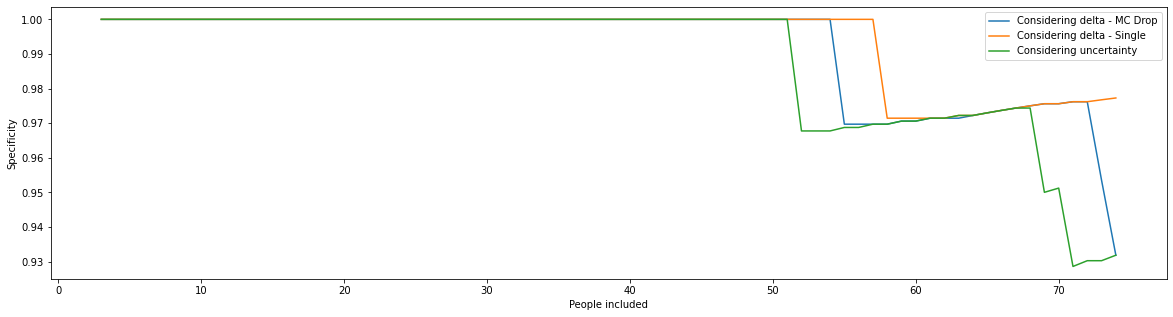

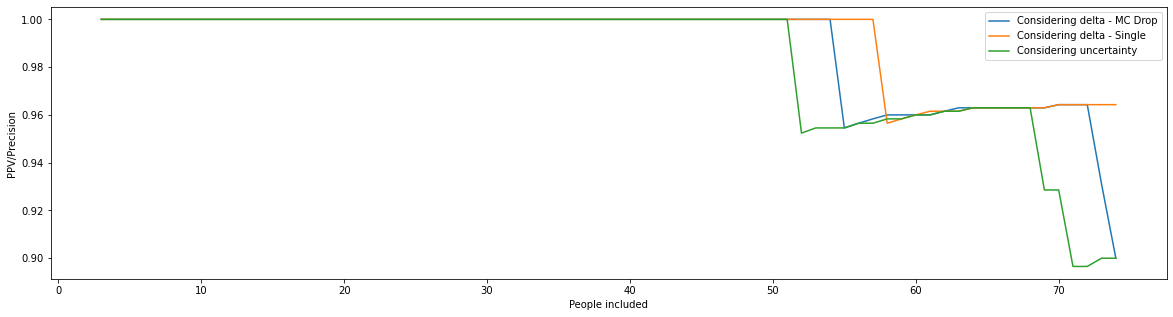

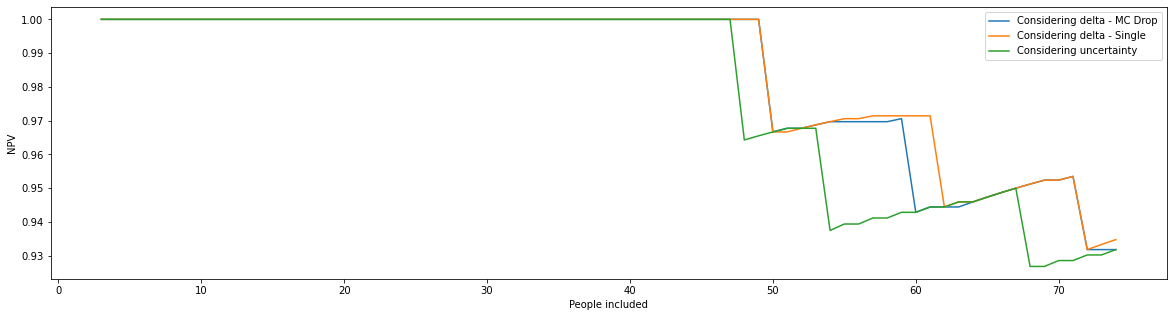

In [14]:
plot_all_comparisons(joined_df, single_pass, threshold=0.5, starting_num_people=3, save_plot='figs/adni_delta.pdf')

## At threshold = 0.582169

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


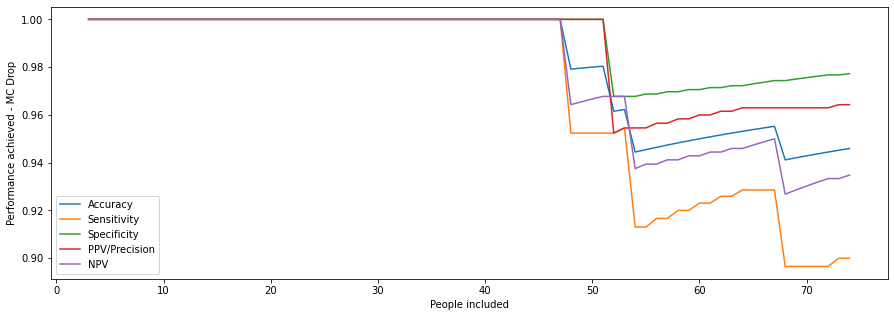

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


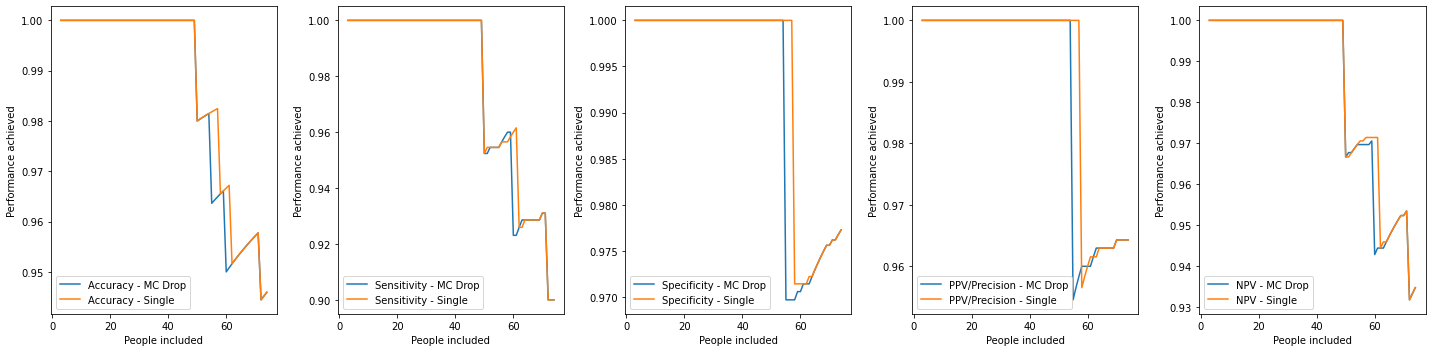

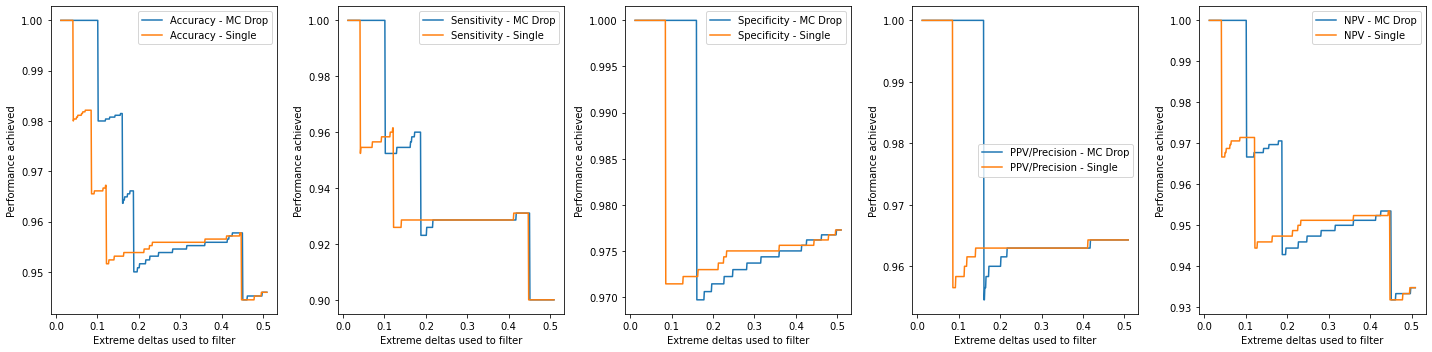

#####################################################################################
################# All 3 approaches together
#####################################################################################


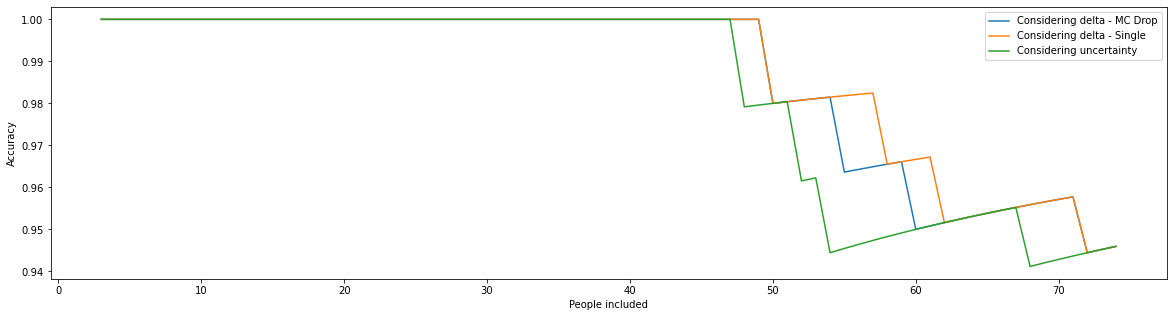

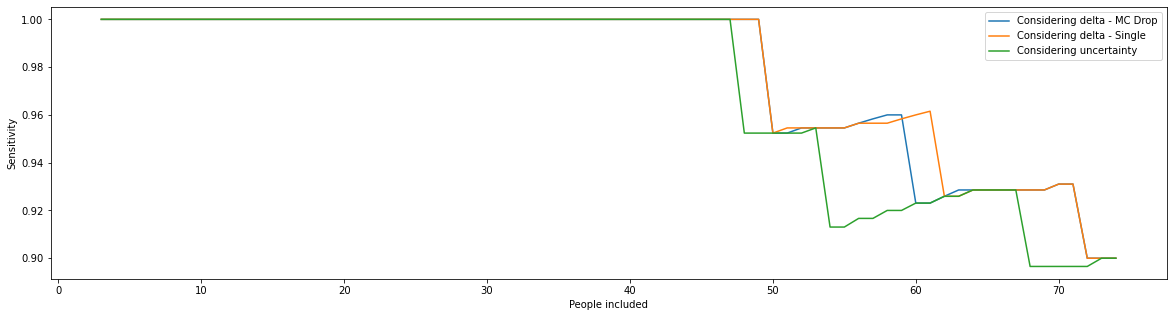

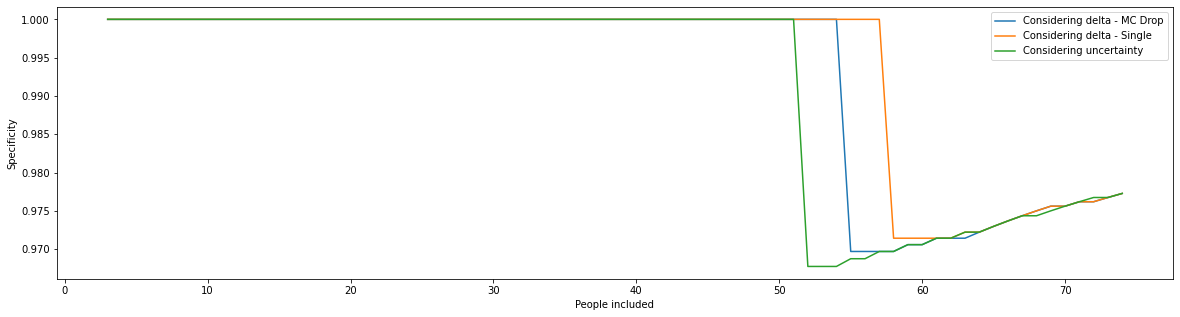

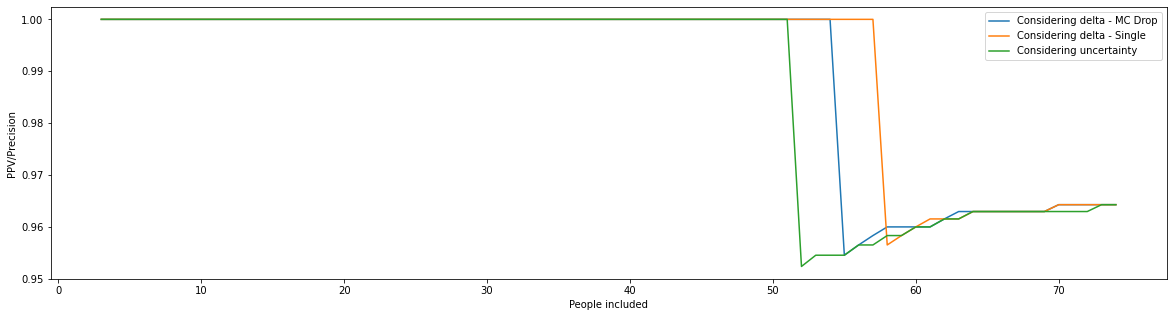

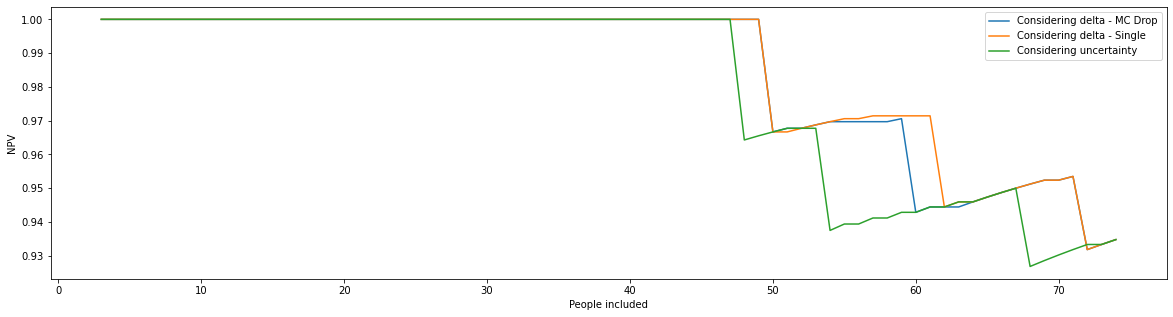

In [14]:
plot_all_comparisons(joined_df, single_pass, threshold=0.582169, starting_num_people=3)